In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('fifa19 l2.csv', sep=",")

In [11]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [12]:
# Список колонок
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [13]:
# Список колонок с типами данных
data.dtypes

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                      

In [14]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Unnamed: 0 - 0
ID - 0
Name - 0
Age - 0
Photo - 0
Nationality - 0
Flag - 0
Overall - 0
Potential - 0
Club - 241
Club Logo - 0
Value - 0
Wage - 0
Special - 0
Preferred Foot - 48
International Reputation - 48
Weak Foot - 48
Skill Moves - 48
Work Rate - 48
Body Type - 48
Real Face - 48
Position - 60
Jersey Number - 60
Joined - 1553
Loaned From - 16943
Contract Valid Until - 289
Height - 48
Weight - 48
LS - 2085
ST - 2085
RS - 2085
LW - 2085
LF - 2085
CF - 2085
RF - 2085
RW - 2085
LAM - 2085
CAM - 2085
RAM - 2085
LM - 2085
LCM - 2085
CM - 2085
RCM - 2085
RM - 2085
LWB - 2085
LDM - 2085
CDM - 2085
RDM - 2085
RWB - 2085
LB - 2085
LCB - 2085
CB - 2085
RCB - 2085
RB - 2085
Crossing - 48
Finishing - 48
HeadingAccuracy - 48
ShortPassing - 48
Volleys - 48
Dribbling - 48
Curve - 48
FKAccuracy - 48
LongPassing - 48
BallControl - 48
Acceleration - 48
SprintSpeed - 48
Agility - 48
Reactions - 48
Balance - 48
ShotPower - 48
Jumping - 48
Stamina - 48
Strength - 48
LongShots - 48
Aggression - 48
Intercep

In [15]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 18207


In [16]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Club. Тип данных object. Количество пустых значений 241, 1.32%.
Колонка Preferred Foot. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Work Rate. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Body Type. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Real Face. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Position. Тип данных object. Количество пустых значений 60, 0.33%.
Колонка Joined. Тип данных object. Количество пустых значений 1553, 8.53%.
Колонка Loaned From. Тип данных object. Количество пустых значений 16943, 93.06%.
Колонка Contract Valid Until. Тип данных object. Количество пустых значений 289, 1.59%.
Колонка Height. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Weight. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка LS. Тип данных object. Количество пустых значений 2085, 11.45%.
Колонка ST. Тип данных object. Количество пустых значений 2085, 11.45%.
Колонка R

In [18]:
cat_temp_data = data[['Position']]
cat_temp_data.head()

,Position
0,RF
1,ST
2,LW
3,GK
4,RCM


In [19]:
cat_temp_data['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [24]:
cat_temp_data[cat_temp_data['Position'].isnull()].shape

(60, 1)

In [26]:
 from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [27]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['RF'],
       ['ST'],
       ['LW'],
       ...,
       ['ST'],
       ['RW'],
       ['CM']], dtype=object)

In [28]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,RF
1,ST
2,LW
3,GK
4,RCM
5,LF
6,RCM
7,RS
8,RCB
9,GK


In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [30]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [31]:
cat_enc['c1'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [32]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [33]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [ ]:
#one-hot

In [36]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [37]:
cat_enc.shape


(18207, 1)

In [38]:
cat_enc_ohe.shape

(18207, 27)

In [39]:
cat_enc_ohe

<18207x27 sparse matrix of type '<class 'numpy.float64'>'
	with 18207 stored elements in Compressed Sparse Row format>

In [40]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1

In [41]:
cat_enc.head(10)

,c1
0,RF
1,ST
2,LW
3,GK
4,RCM
5,LF
6,RCM
7,RS
8,RCB
9,GK


In [42]:
#MinMax масштабирование

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [45]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Age']])

C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


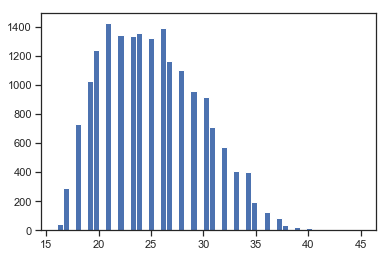

In [46]:
plt.hist(data['Age'], 50)
plt.show()

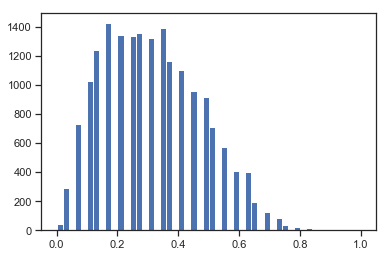

In [47]:
plt.hist(sc1_data, 50)
plt.show()

In [48]:
#на основе Z-оценки - StandardScaler

In [49]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Age']])

C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


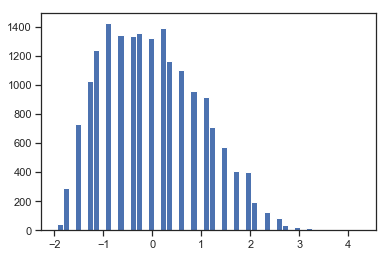

In [50]:
plt.hist(sc2_data, 50)
plt.show()

In [52]:
#нормализация
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Age']])

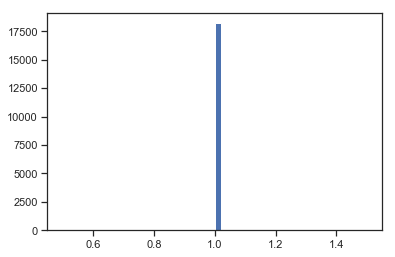

In [53]:
plt.hist(sc3_data, 50)
plt.show()